# PyTorch Hooks for Gradients and Activations

In this notebook, we'll explore the concept of hooks in PyTorch and how they can be used to inspect and manipulate gradients and activations in neural networks. PyTorch provides hooks as a powerful tool for understanding the inner workings of your model during both forward and backward passes.

## Table of Contents

1. [Introduction to Hooks](#introduction-to-hooks)
2. [Inspecting Gradients](#inspecting-gradients)
3. [Analyzing Activations](#analyzing-activations)
4. [Example: Using Hooks with ResNet-18](#example-using-hooks-with-resnet-18)

Let's dive in!


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
#resnet18 setup

model = models.resnet18(pretrained=True)

C:\Users\Alexandre\AppData\Roaming\Python\Python311\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Alexandre\AppData\Roaming\Python\Python311\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


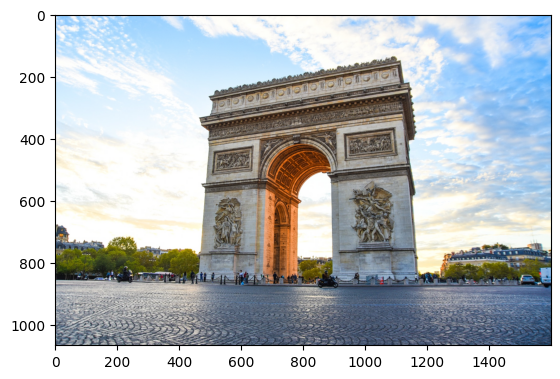

In [3]:
img = Image.open("./img1.jpg")

plt.imshow(img)

## Introduction to Hooks

Hooks in PyTorch are callback functions that allow you to intercept and observe the behavior of your model during both forward and backward passes. They provide a way to register functions that will be executed when certain events occur within the neural network, such as the computation of gradients or the evaluation of activations in individual layers.

### Types of Hooks

There are two main types of hooks:

1. **Forward Hooks**: These hooks are executed during the forward pass of the model. They allow you to inspect the input, output, or intermediate activations of specific layers before the data is passed on to subsequent layers.

2. **Backward Hooks**: Backward hooks, on the other hand, are executed during the backward pass of the model. They enable you to examine and manipulate gradients as they propagate backwards through the network during backpropagation.

### Why Use Hooks?

Hooks are valuable for various purposes, including:

- **Debugging**: Hooks enable you to debug your model by providing insights into the behavior of individual layers, such as the values of activations and gradients.
  
- **Feature Visualization**: By analyzing the activations of different layers, you can gain insights into what features the model has learned to extract from the input data.
  
- **Model Interpretability**: Understanding the inner workings of your model can help you interpret its decisions and improve its performance.

In the following sections, we'll explore how to use hooks to inspect gradients and activations in PyTorch models, with practical examples and demonstrations.


## Inspecting Gradients

One of the key use cases for hooks in PyTorch is inspecting gradients during the backward pass. Gradients provide valuable information about how the loss function changes with respect to the model parameters, which is essential for optimizing the model using techniques like gradient descent.

### Using Hooks to Access Gradients

You can use hooks to access gradients at different points in the model. For example, you may want to examine the gradients of the input with respect to the loss, or the gradients of specific layers with respect to the loss.

To do this, you can define a custom hook function that will be called during the backward pass. This function can then access and inspect the gradients of interest.

## Analyzing Activations

In addition to inspecting gradients, hooks can also be used to analyze activations within the model. Activations represent the output of each layer in the neural network after applying the activation function.

### Understanding Layer Activations

Analyzing layer activations can provide insights into how information flows through the network and how different layers contribute to the model's predictions. It can help identify whether certain layers are being underutilized or if there are any issues with vanishing or exploding gradients.

### Using Hooks to Capture Activations

Similar to inspecting gradients, you can use hooks to capture activations at different layers of the model during the forward pass. This allows you to observe the values of activations and how they evolve as the input data propagates through the network.

### Practical Examples

We'll demonstrate how to:

- Register hooks to capture activations at specific layers of the model.
- Visualize and analyze layer activations to gain insights into the model's behavior.

Now, let's move on to some code examples to see how we can use hooks to analyze activations in PyTorch models.


## Example: Using Hooks with ResNet-18

In this example, we'll demonstrate how to use hooks to capture and analyze activations in a pre-trained ResNet-18 model. We'll register hooks on specific layers of the model to capture the activations during the forward pass and visualize them for analysis.

In [4]:
activations = {}

def capture_activations(name):
    def hook(model, input, output):
        activations[name] = output.detach()
    return hook

# Choose a layer to capture activations
target_layer = model.layer1[1].conv1
hook_handle = target_layer.register_forward_hook(capture_activations("layer1_activation"))

Now, let's pass some input data through the model to trigger the forward pass and capture the activations.

In [5]:
#img to tensor + IN1K normalisation
tf = transforms.Compose([transforms.ToTensor(),
                         transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

input_data = tf(img).unsqueeze(0) # size : [1, 3, *, *]


#forward pass
output = model(input_data)

Finally, we'll visualize the captured activations for analysis. Depending on the layer chosen, the shape and content of the activations may vary.

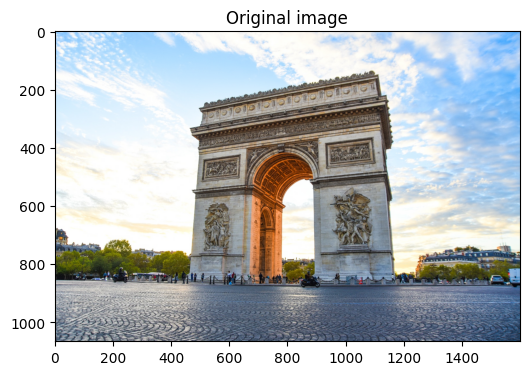

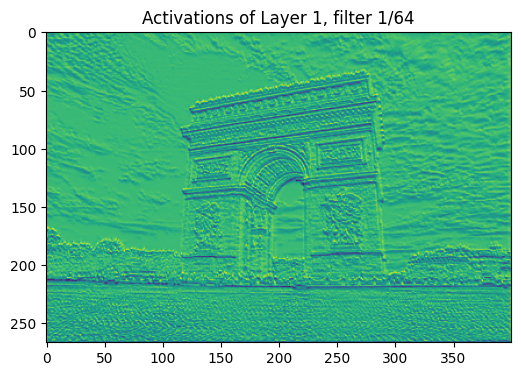

In [6]:
import matplotlib.pyplot as plt

# Plot the activations
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.title("Original image")

plt.figure(figsize=(6, 6))
plt.imshow(activations["layer1_activation"][0, 0], cmap='viridis')
plt.title("Activations of Layer 1, filter 1/64")
plt.show()


Don't forget to remove the hook after you're done to prevent memory leaks.

In [7]:
hook_handle.remove()

By following these steps, you can use hooks to capture and analyze activations in PyTorch models, gaining insights into how information flows through the network.